## 詞頻計算

In [1]:
news = '''
北部本土登革熱疫情擴大，繼上周新北市鶯歌區一對50歲夫妻感染登革熱後，今衛福部疾管署再宣布，其鄰居和離住處3公里外友人共2名中年男子也感染，疫情僅過1周再添2例，並有157名接觸者密切監測健康狀況，北部已有4名本土登革熱病例，相較南部3例，為歷年來北部本土疫情首度超過南部。
疾管署副署長羅一鈞指出，這2名感染者為中年男性，其中1人與日前群聚感染的50歲夫妻比鄰而居，上月下旬經蚊蟲叮咬後，10月1日出現發燒、頭痛、肌肉痛、惡心等症狀，隔2日就醫經通報採檢；另1名雖與夫妻居住逾3公里，無出現感染症狀，但因每日皆至夫妻住家後耕田，經擴大疫調後採檢驗出感染。

疾管署表示，此次群聚事件，透過4名感染者已掌握157名相關接觸者進行健康監測至本月29日，研判此次疫情與日前的夫妻群聚感染為同一波蚊蟲叮咬，若再相隔2周以後再出現感染者，疫情便會擴大至下一波，範圍擴大。羅一鈞說，北部本土登革熱疫情超越南部較少見，為阻絕疫情，已針對感染者住家周邊加強病媒蚊清除與感染源調查。

疾管署統計，北部本土登革熱群聚新增個案已累計4例，南部累計3例，國內目前截至7例本土病例，與242例境外移入病例且含2例死亡個案、8起境外移入群聚事件。

羅一鈞呼籲，目前登革熱屬病媒蚊活躍期，民眾除勤加清除孳生源、降低病媒蚊密度外，若出現疑似症狀應就醫，且返家做好防蚊措施，避免被蚊蟲再次叮咬造成次波感染。
'''

In [6]:
import jieba
jieba.load_userdict('localdict.txt')
words = []
for term in jieba.cut(news):
    words.append(term)

### 詞頻計算方法一 (字典)

In [8]:
dic = {}
for ele in words:
    if ele not in dic:
        dic[ele] = 1
    else:
        dic[ele] = dic[ele] + 1

In [13]:
import operator
swd = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)
#swd
#dic.items()

### 詞頻計算方法二 (collections)
- https://docs.python.org/3/library/collections.html

In [17]:
t = ('感染', 8)
k,v = t
k

'感染'

In [18]:
from collections import Counter
c = Counter(words)
for k, v in c.most_common(50):
    if len(k) >=2:
        print(k,v)

感染 8
疫情 7
本土 6
登革熱 6
北部 5
夫妻 5
群聚 5
疾管署 4
南部 4
感染者 4
病例 3
羅一鈞 3
蚊蟲 3
叮咬 3
出現 3
病媒蚊 3
擴大 2
50 2
公里 2
157 2
監測 2
健康 2
日前 2
症狀 2
住家 2
此次 2
事件 2


## TFIDF 計算

In [26]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']

In [27]:
#tfidf('a', a)
import math
tf  = 1/1
idf = math.log(3/3)
tf * idf 

0.0

In [28]:
#tfidf('a', abb)
tf = 1/3
idf = math.log(3/3)
tf * idf 

0.0

In [29]:
#tfidf('b', abb)
tf = 2/3
idf = math.log(3/2)
tf *idf 

0.27031007207210955

In [30]:
#tfidf('a', abc)
tf = 1/3
idf = math.log(3/3)
tf * idf 

0.0

In [31]:
#tfidf('b', abc)
tf = 1/3
idf = math.log(3/2)
tf * idf 

0.13515503603605478

In [32]:
#tfidf('c', abc)
tf = 1/3
idf = math.log(3/1)
tf * idf 

0.3662040962227032

In [33]:
abb = ['a', 'b', 'b']
abb.count('b')

2

In [37]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
ary = []
for doc in D:
    if 'b' in doc:
        ary.append(doc)
len(ary)

len([ doc for doc in D if 'b' in doc ])

2

In [42]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a,abb,abc]

def tfidf(t, d, D):
    tf = d.count(t) / len(d)
    idf = math.log(len(D) / len([ doc for doc in D if t in doc ]) )
    return tf * idf
    
print(tfidf('a', a, D))
print(tfidf('a', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abb, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))


0.0
0.0
0.0
0.27031007207210955
0.13515503603605478
0.3662040962227032


## Jieba 關鍵詞
- C:\ProgramData\Anaconda3\Lib\site-packages\jieba\analyse\idf.txt

In [43]:
import jieba.analyse 
tags=jieba.analyse.extract_tags(news,5)
print(",".join(tags))

登革熱,疫情,群聚,感染,疾管署


## 使用sklearn 求得詞頻矩陣

In [50]:
import jieba
jieba.load_userdict('localdict.txt')
ary= [ '出國旅遊防蚊不可輕忽30多歲女性染登革熱返台亡',
       '女子遊越南感染登革熱住院7天過世',
       '37歲女越南旅行返國染登革熱致免疫風暴死亡']

corpus = []
for sentence in ary:
    #words = []
    #for ele in jieba.cut(sentence):
    #    words.append(ele)
    #print(' '.join(words))
    corpus.append(' '.join([ele for ele in jieba.cut(sentence)]))
corpus



['出國 旅遊 防蚊 不可 輕忽 30 多歲 女性 染 登革熱 返台 亡',
 '女子 遊 越南 感染 登革熱 住院 7 天 過世',
 '37 歲 女 越南 旅行 返國 染 登革熱 致 免疫 風暴 死亡']

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X

<3x21 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [56]:
print(vectorizer.get_feature_names())
X.toarray()

['30', '37', '不可', '住院', '免疫', '出國', '多歲', '女子', '女性', '感染', '旅行', '旅遊', '死亡', '登革熱', '越南', '輕忽', '返台', '返國', '過世', '防蚊', '風暴']


array([[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [64]:
import numpy
a = numpy.array([180,168,172,188,153])
#a.sort()
#a
a.argsort()[::-1]


array([3, 0, 2, 1, 4], dtype=int64)

In [65]:
cnt = X.toarray().sum(axis = 0)
cnt.argsort()[::-1]

array([13, 14, 20,  8,  1,  2,  3,  4,  5,  6,  7, 10,  9, 19, 11, 12, 15,
       16, 17, 18,  0], dtype=int64)

In [67]:
terms = numpy.array(vectorizer.get_feature_names())
terms[cnt.argsort()[::-1]]

array(['登革熱', '越南', '風暴', '女性', '37', '不可', '住院', '免疫', '出國', '多歲', '女子',
       '旅行', '感染', '防蚊', '旅遊', '死亡', '輕忽', '返台', '返國', '過世', '30'], 
      dtype='<U3')

In [69]:
cnt = X.toarray().sum(axis = 0)
terms = numpy.array(vectorizer.get_feature_names())
for t, c in zip(terms, cnt):
    print(t,c)

30 1
37 1
不可 1
住院 1
免疫 1
出國 1
多歲 1
女子 1
女性 1
感染 1
旅行 1
旅遊 1
死亡 1
登革熱 3
越南 2
輕忽 1
返台 1
返國 1
過世 1
防蚊 1
風暴 1


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X

<3x21 sparse matrix of type '<class 'numpy.float64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [71]:
X.toarray()

array([[ 0.32705548,  0.        ,  0.32705548,  0.        ,  0.        ,
         0.32705548,  0.32705548,  0.        ,  0.32705548,  0.        ,
         0.        ,  0.32705548,  0.        ,  0.19316423,  0.        ,
         0.32705548,  0.32705548,  0.        ,  0.        ,  0.32705548,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.45050407,  0.        ,
         0.        ,  0.        ,  0.45050407,  0.        ,  0.45050407,
         0.        ,  0.        ,  0.        ,  0.26607496,  0.34261996,
         0.        ,  0.        ,  0.        ,  0.45050407,  0.        ,
         0.        ],
       [ 0.        ,  0.37994462,  0.        ,  0.        ,  0.37994462,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.37994462,  0.        ,  0.37994462,  0.22440141,  0.28895767,
         0.        ,  0.        ,  0.37994462,  0.        ,  0.        ,
         0.37994462]])

## 計算文章之間的距離

In [82]:
a = [1, 0, 1]
b = [1, 1, 0]

a1 = numpy.array(a)
b1 = numpy.array(b)

#Euclidean Distance
math.sqrt(sum((b1 - a1) * (b1 - a1)))
#Mahattan Distance
sum(abs(b1 - a1))

2

In [83]:
#   柯文哲  趙藤雄 大巨蛋
a = [1,     1,    1, 0,0,0,0,0,0,0,0,0,0]
b = [1,     1,    1, 1,1,1,1,1,1,1,1,1,1]
a1 = numpy.array(a)
b1 = numpy.array(b)
math.sqrt(sum((b1 - a1) * (b1 - a1)))

3.1622776601683795

## Cosine Distance

In [ ]:
# cos = A 。 B / |A| X |B|

In [88]:
a = [1, 2, 2, 1, 1, 1, 0]
b = [1, 2, 2, 1, 1, 2, 1]

a1 = numpy.array(a)
b1 = numpy.array(b)

sum(a1 * b1) / (math.sqrt(sum(a1 * a1)) * math.sqrt(sum(b1 * b1)))

0.93819418743314187

In [93]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
a = [1, 2, 2, 1, 1, 1, 0]
b = [1, 2, 2, 1, 1, 2, 1]
m  = numpy.array([a,b])
#cosine_distances(m)
cosine_similarity(m)

array([[ 1.        ,  0.93819419],
       [ 0.93819419,  1.        ]])

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X

<3x21 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [97]:
ary= [ '出國旅遊防蚊不可輕忽30多歲女性染登革熱返台亡',
       '女子遊越南感染登革熱住院7天過世',
       '37歲女越南旅行返國染登革熱致免疫風暴死亡']
cosine_similarity(X.toarray())
cosine_distances(X.toarray())

array([[ 0.        ,  0.87090056,  0.8881966 ],
       [ 0.87090056,  0.        ,  0.71132487],
       [ 0.8881966 ,  0.71132487,  0.        ]])

In [103]:
cosine_similarity(X.toarray())[0].argsort()[::-1][1:]
cosine_similarity(X.toarray())[1].argsort()[::-1][1:]
cosine_similarity(X.toarray())[2].argsort()[::-1][1:]

array([1, 0], dtype=int64)

## 抓取蘋果新聞

In [ ]:
import requests
from bs4 import BeautifulSoup
domain = 'http://www.appledaily.com.tw'
res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/')
soup = BeautifulSoup(res.text, 'html.parser')
news = []
for link in soup.select('.rtddt a'):
    dic = {}
    res2 = requests.get(domain + link['href'])
    soup2 = BeautifulSoup(res2.text, 'html.parser')
    dic['category'] = soup.select('h2')[0].text
    dic['content'] = soup2.select('#summary')[0].text
    dic['title']   = soup2.select('#h1')[0].text
    news.append(dic)

In [1]:
import pandas
appledaily = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/20171003_applenews.xlsx')

In [4]:
corpus = []
titles = []

import jieba
for news in appledaily.iterrows():
    corpus.append(' '.join(jieba.cut(news[1].content)))
    titles.append(news[1].title)
    #print(news[1].title)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\befun\AppData\Local\Temp\jieba.cache
Loading model cost 2.963 seconds.
Prefix dict has been built succesfully.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X

<1020x41915 sparse matrix of type '<class 'numpy.int64'>'
	with 133567 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
cosine_similarities = cosine_similarity(X.toarray())

In [9]:
cosine_similarities.shape

(1020, 1020)

In [14]:
print(titles[0])
for idx in cosine_similarities[0].argsort()[::-1][1:10]:
    print(titles[idx], cosine_similarities[0][idx])

路人闖入遭自強號撞死　彰化至竹南站間一度延誤
路人闖入遭自強號撞死　彰化至竹南站間一度延誤 0.96
男子闖鐵軌遭撞死　班次延誤返鄉旅客無奈 0.466666666667
搭火車到這6站　可享轉乘優惠21元 0.179231397376
變壓器突毀損　中友百貨局部停電 0.17240873134
美國賭城槍響　觀光局：我國旅行團人員平安 0.172038703309
【慎入片】女駕駛出車禍　回神驚見友人嘴以上全部噴飛 0.168732297546
秋老虎發威　台北今中午熱到36.4℃ 0.166666666667
爆頭之後更神勇　響尾蛇雷伊傷後K功更恐怖 0.159673888624
首款國產98吋4K電視今亮相 0.158999682001


In [31]:
def getSimiliarArticle(query_idx, threshold):
    print('查詢文章:',titles[query_idx])
    for idx in cosine_similarities[query_idx].argsort()[::-1][1:10]:
        if cosine_similarities[query_idx][idx] > threshold:
            print('相關文章:',titles[idx], cosine_similarities[query_idx][idx])
        
getSimiliarArticle(210, 0.15)

查詢文章: 被柯P酸放病毒入台　葉俊榮：他應感謝內政部協辦世大運
相關文章: 核准《中國新歌聲》2原因　管媽揭就是因北市府 0.437463124722
相關文章: 「中國新歌聲」惹議　北市府：中央大可拒絕活動舉辦 0.421093685746
相關文章: 「中國新歌聲」遭批是統戰病毒　柯Ｐ：病毒是內政部放進來的 0.336791683964
相關文章: 台大濺血案　教長：場地租借、治安維繫單位各有權責 0.191168599102
相關文章: 【呼籲片】李明哲恐已被秘密宣判　台權會要求蔡英文政府表態 0.171899732007
相關文章: 賭城槍擊　中國網友冷回：我們正享受假期 0.162325744941


## 機器人問答資料

In [42]:
import pandas
df = pandas.read_csv('results.csv', sep='\t', encoding='utf-8')
df.columns

Index(['message', 'Timestamp'], dtype='object')

In [45]:
df.head()

,message,Timestamp
0,家裡好多蚊子怎麼辦？又擔心會有登革熱(what?!)快來看！防疫醫師來幫大家解答囉！,NaN
1,https://goo.gl/6YdkmJ,2017/9/27 02:04
2,有那些人可以接種流感疫苗呢？,2017/9/28 09:48
3,你好帥,2017/9/28 10:28
4,帥哥,2017/9/28 10:28


In [53]:
corpus = []
titles = []
import jieba
for rec in df.iterrows():
    corpus.append(' '.join(jieba.cut(str(rec[1].message) )))
    titles.append(rec[1].message)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X

<3713x1975 sparse matrix of type '<class 'numpy.float64'>'
	with 6040 stored elements in Compressed Sparse Row format>

In [55]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
cosine_similarities = cosine_similarity(X.toarray())

In [64]:
def getSimiliarArticle(query_idx, threshold):
    print('查詢文章:',titles[query_idx])
    for idx in cosine_similarities[query_idx].argsort()[::-1][1:10]:
        if cosine_similarities[query_idx][idx] > threshold:
            print('相關文章:',idx, titles[idx], cosine_similarities[query_idx][idx])
        
getSimiliarArticle(1308, 0.15)

查詢文章: 流感疫苗是什麼
相關文章: 786 什麼是流感疫苗 1.0
相關文章: 1112 要吃什麼 0.74871393522
相關文章: 332 你會做什麼 0.74871393522
相關文章: 307 你懂什麼 0.74871393522
相關文章: 1009 四價流感疫苗多的是什麼 0.698049656128
相關文章: 54 打流感疫苗，會很痛嗎？ 0.662893236658
相關文章: 723 你有打流感疫苗嗎？ 0.662893236658
相關文章: 1200 流感疫苗有幾總 0.662893236658
相關文章: 17 我想打流感疫苗 0.662893236658


## 新聞分群

### 讀取文章資料

In [65]:
import pandas
appledaily = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/20171003_applenews.xlsx')

### 文章切詞

In [66]:
corpus = []
titles = []

import jieba
for news in appledaily.iterrows():
    corpus.append(' '.join(jieba.cut(news[1].content)))
    titles.append(news[1].title)

### 產生TFIDF 矩陣

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X

<1020x41915 sparse matrix of type '<class 'numpy.float64'>'
	with 133567 stored elements in Compressed Sparse Row format>

### 計算Cosine Similarity

In [68]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
cosine_similarities = cosine_similarity(X.toarray())

### KMeans 分群

In [77]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=20)
kc = clf.fit_predict(cosine_similarities)

In [110]:
a = [2,2,1,1,2,1]
for idx, ele in enumerate(a):
    if ele == 2:
        print(idx)
a1 = numpy.array(a)
a1 == 2

0
1
4


array([ True,  True, False, False,  True, False], dtype=bool)

### 取出分群結果

In [78]:
import numpy as np
titles_ary = np.array(titles)

In [84]:
for news in titles_ary[kc == 5]:
    print(news)

台積電如何分工？　傳魏哲家負責最大客戶蘋果、劉德音負責高通
【張忠謀將退休】當年這3場勝仗　徹底打趴三星、格羅方德
【張忠謀將退休】台積電開低走高　收盤漲近1%
老謝讚：張董是創造台灣價值的瑰寶　後人恐難以超越
張忠謀怎麼激勵員工力拚「重要戰役」？　底薪加3成、分紅加5成！
十月三日各報頭條搶先報
十月三日財經焦點搶先看
【張忠謀將退休】創立台積「第一桶金」哪來？　原來是英特爾創辦人下單
【張忠謀將退休】1張圖看懂　台積電30年來成長路徑
【明年6月裸退片】張忠謀：留給台積最後貢獻是「雙首長制」
【張忠謀將退休】投資人對交棒有信心　台積電ADR「股漲」
​張忠謀：市場沒問題　台積電未來挑戰是來自於競爭者
【回鍋片】張忠謀2005年曾交棒　因這件事重掌兵符
【張忠謀將退休】陸行之：沒他就沒台灣超強半導體業
【張忠謀將退休】蔡力行：他是成功、穩健的創業家
張忠謀身家直逼3百億　名列台灣第50大富豪
台積電雙首長有何特質？張忠謀這樣說
奉獻台積30年　張忠謀感性告白「天下無不散宴席」
談退休後的生活　張忠謀：寫自傳、打橋牌及旅遊
張忠謀譜浪漫黃昏戀　古稀之年迎娶張淑芬
【張忠謀將退休】外資：無縫接軌領軍台積軍隊
【巨擘動畫】半導體教父張忠謀　30年打造台灣驕傲
【張忠謀將退休】接班不穩定性排除　法人判讀為利多
【張忠謀將退休】寶成蔡其瑞：他是我的人生楷模
【蘋果Live】張忠謀16:30主持記者會　宣布明年退休
【蘋果Live】張忠謀16:30主持記者會　宣布明年退休
【張忠謀將退休】國安基金：不捨但相信繼任者
【張忠謀將退休】怎麼找接班人？　曾趣言「最好的不會比我更好」
【張忠謀將退休】他讚「巨人選在最好時候退場」
【張忠謀將退休】儲祥生：台積電明股價恐受衝擊
【張忠謀將退休】學者：後年考驗才開始


In [116]:
import numpy
feature_names = numpy.array(vectorizer.get_feature_names())


X2 = X.toarray()[kc==1]
colsum = X2.sum(axis=0)
rank = X2.sum(axis=0).argsort()[::-1]
for idx in rank:
    if colsum[idx] >= 1:
        print(feature_names[idx], colsum[idx])
#for ele in feature_names[rank][0:10]:
#    print(ele, colsum)

加斯 2.32584354436
拉斯 2.28524509014
美國 2.21252414317
酒店 2.03007054831
賭城 1.91810980417
槍擊案 1.8755289307
發生 1.8066073635
當地 1.39329049802
槍枝 1.32727201117
槍擊 1.25120667218
我們 1.13931341702
管制 1.13006592828


In [119]:
def getKeyTerm(cluster):
    X2 = X.toarray()[kc==cluster]
    colsum = X2.sum(axis=0)
    rank = X2.sum(axis=0).argsort()[::-1]
    powerterms = []
    for idx in rank:
        if colsum[idx] >= 1:
            #print(feature_names[idx], colsum[idx])
            powerterms.append(feature_names[idx])
    return powerterms

In [126]:
from sklearn.metrics import silhouette_score
for c in range(2,30):
    clf = KMeans(n_clusters=c)
    kc = clf.fit_predict(cosine_similarities)
    print(c, silhouette_score(X, kc))
#for c in range(0,20):
#    print(c, getKeyTerm(c))

2 0.00316921304821
3 0.00294169987997
4 0.00544776990321
5 0.00619728556992
6 0.00752879551666
7 0.00840503177234
8 0.00909220399667
9 0.00964073523364
10 0.0119303161722
11 0.0107803026527
12 0.0117215544026
13 0.0122567716481
14 0.0133245176427
15 0.0133154614765
16 0.0147231467946
17 0.0144592210087
18 0.0163443776247
19 0.0174387254138
20 0.016431909184
21 0.0164635580583
22 0.016613268218
23 0.0165729230328
24 0.0191600494257
25 0.0180593576885
26 0.0189748264246
27 0.0184710879724
28 0.0221168557896
29 0.0190949220915


## 機器人問答資料分群

In [1]:
import pandas
df = pandas.read_csv('results.csv', sep='\t', encoding='utf-8')
df.columns

Index(['message', 'Timestamp'], dtype='object')

In [2]:
corpus = []
titles = []
import jieba
for rec in df.iterrows():
    corpus.append(' '.join(jieba.cut(str(rec[1].message) )))
    titles.append(rec[1].message)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\befun\AppData\Local\Temp\jieba.cache
Loading model cost 2.200 seconds.
Prefix dict has been built succesfully.


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X

<3713x1975 sparse matrix of type '<class 'numpy.float64'>'
	with 6040 stored elements in Compressed Sparse Row format>

In [89]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
cosine_similarities = cosine_similarity(X.toarray())

In [5]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=20)
kc = clf.fit_predict(cosine_similarities)

In [6]:
import numpy as np
titles_ary = np.array(titles)

In [7]:
for news in titles_ary[kc == 19]:
    print(news)

先不用
先不用
先不用
先不用
不用
先不用
先不用
先不用
先不用
先不用
先不用
先不用
先不用
先不用
先不用
不用了
不用了
先不用
先不用
不用
先不用
不用了
不用了，謝謝你。
先不用
先不用
先不用
先不用
先不用
不用
不用了
先不用
不用了，謝謝


In [160]:
import networkx as nx

graph = nx.Graph()
graph.add_edge('台北101', '忠孝敦化', duration=5)
graph.add_edge('台北車站', '忠孝復興', duration=10)
graph.add_edge('忠孝復興', '忠孝敦化', duration=2)
graph.add_edge('忠孝敦化', '敦化南路二段', duration=10)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

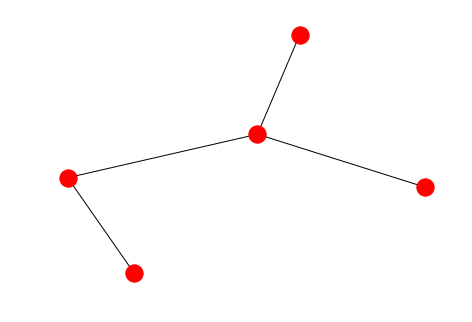

In [161]:
%pylab inline
nx.draw(graph)

In [162]:
cosine_similarities

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [8]:
import networkx as nx
graph = nx.Graph()
for i, v1 in enumerate(cosine_similarities):
    for j, v2 in enumerate(v1):
        if (cosine_similarities[i,j] >= 0.8) and (i != j):
            graph.add_edge(i, j)

In [169]:
! pip install python-louvain

  Running setup.py bdist_wheel for python-louvain: started
  Running setup.py bdist_wheel for python-louvain: finished with status 'done'
  Stored in directory: C:\Users\befun\AppData\Local\pip\Cache\wheels\1f\b7\d9\40b9f879db29b3bba9e47e1b88436cedc01ee846a0836efa3d
Successfully built python-louvain


In [9]:
import community
partition = community.best_partition(graph)



In [97]:
import numpy
feature_names = numpy.array(vectorizer.get_feature_names())

def getKeyTerm2(cluster):
    kc2 = numpy.array([ele for ele in partition.values()])
    X2 = X.toarray()[kc2==cluster]
    colsum = X2.sum(axis=0)
    rank = X2.sum(axis=0).argsort()[::-1]
    powerterms = []
    for idx in rank:
        if colsum[idx] >= 2:
            powerterms.append(feature_names[idx])
    return powerterms

In [100]:
from collections import Counter
c = Counter(partition.values())
for c, cnt in c.most_common(30):
    #print(getKeyTerm2(c))
    print(c)

28
69
74
31
63
0
40
81
14
33
105
27
112
98
123
37
92
6
25
29
56
111
11
12
91
13
30
194
36
100


In [103]:
for ele in partition.items():
    if ele[1] == 123:
        print(titles[ele[0]])

我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學
我要看分享位置訊息使用教學


In [80]:
for rec in c.most_common(30):
    print(rec)

(28, 140)
(69, 62)
(74, 46)
(31, 45)
(63, 41)
(0, 39)
(40, 30)
(81, 29)
(14, 24)
(33, 23)
(105, 23)
(27, 19)
(112, 19)
(98, 18)
(123, 18)
(37, 17)
(92, 17)
(6, 16)
(25, 16)
(29, 16)
(56, 16)
(111, 16)
(11, 15)
(12, 15)
(91, 15)
(13, 13)
(30, 13)
(194, 12)
(36, 11)
(100, 10)


In [72]:
answer = {'怎麼查詢常見傳染病？': '請下傳染病關鍵字',
          '你好帥':'我每天早上都被自己帥醒',
          '謝謝': '不客氣',
          '能公費接種嗎': '那你幾歲?',
          '發燒可以打疫苗嗎': '不行',
          '發燒': '你保重'}

In [74]:
q = '怎麼查詢常見的傳染病？'
q = '我發燒了'
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
q_seg = ' '.join(jieba.cut(q))

for a in answer:
    a_seg = ' '.join(jieba.cut(a))
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform([q_seg, a_seg])
    cs = cosine_similarity(X)
    score = cs[0,1]
    #print(q_seg, a_seg, cs)
    if score >= 0.8:
        print(answer[a])
        break

你保重


In [105]:
answer = {'查詢 傳染病': '請下傳染病關鍵字',
          '你好帥':'我每天早上都被自己帥醒',
          '謝謝': '不客氣',
          '公費 接種': '那你幾歲?',
          '發燒 打疫苗': '不行',
          '發燒': '你保重',
          '分享 位置 訊息 使用 教學': '請看以下畫面'}

In [107]:

def getAutoResponse(q):
    q_seg = ' '.join(jieba.cut(q))

    for a in answer:
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform([q_seg, a])
        cs = cosine_similarity(X)
        score = cs[0,1]
        if score >= 0.8:
            return answer[a]
    return '我不知道你再說什麼'
        
q = '怎麼查詢常見的傳染病？'
q = '我發燒了'
getAutoResponse('我要看分享位置訊息使用教學')


'請看以下畫面'